In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray
import rioxarray as rxr
import glob
from datetime import datetime
import pytz
from pyproj import Proj, Transformer
import os

In [2]:
tz = pytz.timezone('US/Eastern')

def toUTC(d):
    return tz.normalize(tz.localize(d)).astimezone(pytz.utc)

In [3]:
times_GOES = pd.read_csv('../../heat_data/GOES_DMV/GOES_times_DMV.csv')

In [4]:
times_GOES.value = (times_GOES.value/1000).apply(datetime.fromtimestamp).apply(toUTC)

In [5]:
times_GOES

system:index                            value  \
0               0 2023-06-01 00:46:17.400000+00:00   
1               1 2023-06-01 01:46:17.400000+00:00   
2               2 2023-06-01 02:46:17.400000+00:00   
3               3 2023-06-01 03:46:17.400000+00:00   
4               4 2023-06-01 04:46:17.400000+00:00   
..            ...                              ...   
691           691 2023-06-29 19:46:17.700000+00:00   
692           692 2023-06-29 20:46:17.700000+00:00   
693           693 2023-06-29 21:46:17.700000+00:00   
694           694 2023-06-29 22:46:17.700000+00:00   
695           695 2023-06-29 23:46:17.700000+00:00   

                                       .geo  
0    {"type":"MultiPoint","coordinates":[]}  
1    {"type":"MultiPoint","coordinates":[]}  
2    {"type":"MultiPoint","coordinates":[]}  
3    {"type":"MultiPoint","coordinates":[]}  
4    {"type":"MultiPoint","coordinates":[]}  
..                                      ...  
691  {"type":"MultiPoint","coordinates":[]}  
692  {"type":"MultiPoint","coordinates":[]}  
693  {"type":"MultiPoint","coordinates":[]}  
694  {"type":"MultiPoint","coordinates":[]}  
695  {"type":"MultiPoint","coordinates":[]}  

[696 rows x 3 columns]

In [8]:
times_Landsat = pd.read_csv('../../heat_data/Landsat_Sentinel_DMV/Landsat_times_DMV.csv')

In [9]:
times_Landsat.value = (times_Landsat.value/1000).apply(datetime.fromtimestamp).apply(toUTC)

In [10]:
times_Landsat

system:index                            value  \
0              0 2023-01-11 15:46:48.979000+00:00   
1              1 2023-02-28 15:46:30.544000+00:00   
2              2 2023-03-16 15:46:23.913000+00:00   
3              3 2023-04-01 15:46:13.064000+00:00   
4              4 2023-04-17 15:45:58.932000+00:00   
5              5 2023-05-03 15:45:53.830000+00:00   
6              6 2023-05-19 15:45:43.340000+00:00   
7              7 2023-06-04 15:45:48.086000+00:00   
8              8 2023-06-20 15:45:55.135000+00:00   
9              9 2023-07-06 15:46:07.055000+00:00   
10            10 2023-07-22 15:46:10.726000+00:00   
11            11 2023-08-07 15:46:18.556000+00:00   
12            12 2023-08-23 15:46:26.493000+00:00   
13            13 2023-09-08 15:46:26.266000+00:00   
14            14 2023-10-10 15:46:36.631000+00:00   
15            15 2023-10-26 15:46:39.352000+00:00   
16            16 2023-11-11 15:46:35.821000+00:00   
17            17 2023-11-27 15:46:41.320000+00:00   
18            18 2023-12-13 15:46:37.454000+00:00   
19            19 2023-12-29 15:46:36.869000+00:00   

                                      .geo  
0   {"type":"MultiPoint","coordinates":[]}  
1   {"type":"MultiPoint","coordinates":[]}  
2   {"type":"MultiPoint","coordinates":[]}  
3   {"type":"MultiPoint","coordinates":[]}  
4   {"type":"MultiPoint","coordinates":[]}  
5   {"type":"MultiPoint","coordinates":[]}  
6   {"type":"MultiPoint","coordinates":[]}  
7   {"type":"MultiPoint","coordinates":[]}  
8   {"type":"MultiPoint","coordinates":[]}  
9   {"type":"MultiPoint","coordinates":[]}  
10  {"type":"MultiPoint","coordinates":[]}  
11  {"type":"MultiPoint","coordinates":[]}  
12  {"type":"MultiPoint","coordinates":[]}  
13  {"type":"MultiPoint","coordinates":[]}  
14  {"type":"MultiPoint","coordinates":[]}  
15  {"type":"MultiPoint","coordinates":[]}  
16  {"type":"MultiPoint","coordinates":[]}  
17  {"type":"MultiPoint","coordinates":[]}  
18  {"type":"MultiPoint","coordinates":[]}  
19  {"type":"MultiPoint","coordinates":[]}

In [11]:
GOES_tif_list = glob.glob('../../heat_data/GOES_DMV/*.tif')
GOES_tif_list

['../../heat_data/GOES_DMV/GOES_image_36.tif',
 '../../heat_data/GOES_DMV/GOES_image_22.tif',
 '../../heat_data/GOES_DMV/GOES_image_23.tif',
 '../../heat_data/GOES_DMV/GOES_image_37.tif',
 '../../heat_data/GOES_DMV/GOES_image_21.tif',
 '../../heat_data/GOES_DMV/GOES_image_35.tif',
 '../../heat_data/GOES_DMV/GOES_image_34.tif',
 '../../heat_data/GOES_DMV/GOES_image_20.tif',
 '../../heat_data/GOES_DMV/GOES_image_24.tif',
 '../../heat_data/GOES_DMV/GOES_image_30.tif',
 '../../heat_data/GOES_DMV/GOES_image_18.tif',
 '../../heat_data/GOES_DMV/GOES_image_19.tif',
 '../../heat_data/GOES_DMV/GOES_image_31.tif',
 '../../heat_data/GOES_DMV/GOES_image_25.tif',
 '../../heat_data/GOES_DMV/GOES_image_33.tif',
 '../../heat_data/GOES_DMV/GOES_image_27.tif',
 '../../heat_data/GOES_DMV/GOES_image_26.tif',
 '../../heat_data/GOES_DMV/GOES_image_32.tif',
 '../../heat_data/GOES_DMV/GOES_image_41.tif',
 '../../heat_data/GOES_DMV/GOES_image_5.tif',
 '../../heat_data/GOES_DMV/GOES_image_4.tif',
 '../../heat_da

In [12]:
def sort_func(s):
    return int(s.split('image_')[1].split('.tif')[0])

In [13]:
GOES_tif_list = sorted(GOES_tif_list, key=sort_func)
GOES_tif_list

['../../heat_data/GOES_DMV/GOES_image_0.tif',
 '../../heat_data/GOES_DMV/GOES_image_1.tif',
 '../../heat_data/GOES_DMV/GOES_image_2.tif',
 '../../heat_data/GOES_DMV/GOES_image_3.tif',
 '../../heat_data/GOES_DMV/GOES_image_4.tif',
 '../../heat_data/GOES_DMV/GOES_image_5.tif',
 '../../heat_data/GOES_DMV/GOES_image_6.tif',
 '../../heat_data/GOES_DMV/GOES_image_7.tif',
 '../../heat_data/GOES_DMV/GOES_image_8.tif',
 '../../heat_data/GOES_DMV/GOES_image_9.tif',
 '../../heat_data/GOES_DMV/GOES_image_10.tif',
 '../../heat_data/GOES_DMV/GOES_image_11.tif',
 '../../heat_data/GOES_DMV/GOES_image_12.tif',
 '../../heat_data/GOES_DMV/GOES_image_13.tif',
 '../../heat_data/GOES_DMV/GOES_image_14.tif',
 '../../heat_data/GOES_DMV/GOES_image_15.tif',
 '../../heat_data/GOES_DMV/GOES_image_16.tif',
 '../../heat_data/GOES_DMV/GOES_image_17.tif',
 '../../heat_data/GOES_DMV/GOES_image_18.tif',
 '../../heat_data/GOES_DMV/GOES_image_19.tif',
 '../../heat_data/GOES_DMV/GOES_image_20.tif',
 '../../heat_data/GOES_

In [14]:
Landsat_tif_list = glob.glob('../../heat_data/Landsat_Sentinel_DMV/*.tif')
Landsat_tif_list

['../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_18.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_10.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_11.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_9.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_13.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_12.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_8.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_16.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_17.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_15.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_14.tif']

In [15]:
Landsat_tif_list = sorted(Landsat_tif_list, key=sort_func)
Landsat_tif_list

['../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_8.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_9.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_10.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_11.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_12.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_13.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_14.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_15.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_16.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_17.tif',
 '../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_18.tif']

In [16]:
def to_binary_string(num):
    if np.isnan(num):
        return np.NaN
    else:
        return f'{int(num):b}'

In [17]:
to_binary_string(55052)

'1101011100001100'

In [18]:
# Define UTM18N projection (WGS84 datum)
global utm_proj 
utm_proj = Proj(proj="utm", zone=18, datum="WGS84", northern=True)

In [87]:
"""
Processing of individual .tif files.

Performs a variety of tasks on the data to make it more easy to read and understand.

Attributes:
    tif (str): Path where tif file is located.
    time (datetime or str): Date and time of when the data was collected.
    name (str): Desired name of output file. Just the name, leave out the ".format" part at the end.
    coord_bounds (tuple or list, optional): Coordinate bounds if you wish to filter the data by location. Order should be
                                    (longitude minimum, longitude maximum, latitude minimum, latitude maximum).
    save_as (str, optional): Format to save the processed data in. For now, only 'nc' is built-in. Anything else
                                    simply returns the data.
"""
def process_Landsat_Sentinel_tif(tif, time, name, coord_bounds=None, save_as='nc'):
    #########################################################################################################
    # Open file and rename variables
    dsLS = rxr.open_rasterio(tif)
    geotiff_ds = dsLS.to_dataset('band')

    geotiff_ds = geotiff_ds.rename({1:'Landsat_LST', 2:'Landsat_Cloud_Mask', 3:'VV_SAR', 4:'VH_SAR', 5:'SAR_angle'})

    #########################################################################################################
    # Convert cloud mask integers to binary strings, then saves individual bits as separate variables
    # while deleting the old cloud mask
    binary_vectorized = np.vectorize(to_binary_string)
    mask = binary_vectorized(geotiff_ds.Landsat_Cloud_Mask.values)

    cloud_conf_substring = lambda t: t[-10:-8]
    vfunc = np.vectorize(cloud_conf_substring)
    cloud_conf = vfunc(mask)
    cloud_conf_int = (cloud_conf == '11').astype(int)*3
    cloud_conf_int += (cloud_conf == '10')*2
    cloud_conf_int += (cloud_conf == '01')
    cloud_conf_str = cloud_conf_int.astype(str)

    cloud_shadow_substring = lambda t: t[-12:-10]
    vfunc = np.vectorize(cloud_shadow_substring)
    cloud_shadow = vfunc(mask)
    cloud_shadow_int = (cloud_shadow == '11').astype(int)*3
    cloud_shadow_int += (cloud_shadow == '10')*2
    cloud_shadow_int += (cloud_shadow == '01')
    cloud_shadow_str = cloud_shadow_int.astype(str)

    snow_ice_substring = lambda t: t[-14:-12]
    vfunc = np.vectorize(snow_ice_substring)
    snow_ice = vfunc(mask)
    snow_ice_int = (snow_ice == '11').astype(int)*3
    snow_ice_int += (snow_ice == '10')*2
    snow_ice_int += (snow_ice == '01')
    snow_ice_str = snow_ice_int.astype(str)

    cirrus_conf_substring = lambda t: t[-16:-14]
    vfunc = np.vectorize(cirrus_conf_substring)
    cirrus_conf = vfunc(mask)
    cirrus_conf_int = (cirrus_conf == '11').astype(int)*3
    cirrus_conf_int += (cirrus_conf == '10')*2
    cirrus_conf_int += (cirrus_conf == '01')
    cirrus_conf_str = cirrus_conf_int.astype(str)

    dilated_cloud_substring = lambda t: t[-2]
    vfunc = np.vectorize(dilated_cloud_substring)
    dilated_cloud = vfunc(mask)

    clear_substring = lambda t: t[-7]
    vfunc = np.vectorize(clear_substring)
    clear = vfunc(mask)

    geotiff_ds['Landsat_Cloud_Confidence'] = (('y', 'x'), cloud_conf_str)
    geotiff_ds['Landsat_Cloud_Shadow_Confidence'] = (('y', 'x'), cloud_shadow_str)
    geotiff_ds['Landsat_Snow_Ice_Confidence'] = (('y', 'x'), snow_ice_str)
    geotiff_ds['Landsat_Cirrus_Confidence'] = (('y', 'x'), cirrus_conf_str)
    geotiff_ds['Landsat_Dilated_Cloud'] = (('y', 'x'), dilated_cloud)
    geotiff_ds['Landsat_Clear_Pixel'] = (('y', 'x'), clear)

    geotiff_ds = geotiff_ds.drop_vars('Landsat_Cloud_Mask')

    #########################################################################################################
    # Assign descriptive attributes for the cloud mask and the file datetime
    #geotiff_ds = geotiff_ds.assign_attrs(
    #    Cloud_Mask_Bits="Must turn cloud mask integers into binary.\nBit 0: Fill\nBit 1: Dilated Cloud\nBit 2: Cirrus (high confidence)\nBit 3: Cloud\nBit 4: Cloud Shadow\n\
    #Bit 5: Snow\nBit 6: Clear\n    0: Cloud or Dilated Cloud bits are set\n    1: Cloud and Dilated Cloud bits are not set\nBit 7: Water\n\
    #Bits 8-9: Cloud Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High\n\
    #Bits 10-11: Cloud Shadow Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High\n\
    #Bits 12-13: Snow/Ice Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High\n\
    #Bits 14-15: Cirrus Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High")

    #geotiff_ds = geotiff_ds.assign_attrs(Datetime=str(time))
    geotiff_ds = geotiff_ds.assign_coords({'datetime':str(time)})
    geotiff_ds = geotiff_ds.assign_attrs(long_name='(\'ST_B10\', \'VV\', \'VH\', \'angle\', \'QA_PIXEL\')')
    
    #########################################################################################################
    # Optional filtering by lat/lon
    if coord_bounds:
        geotiff_ds = geotiff_ds.sel(longitude=slice(coord_bounds[0], coord_bounds[1])).sel(latitude=slice(coord_bounds[3], coord_bounds[2]))

    #########################################################################################################
    # Export
    if save_as=='nc':
        # Convert file into netCDF
        geotiff_ds.to_netcdf(f'{name}.nc')
    else:
        #print(geotiff_ds)
        geotiff_ds.rio.to_raster(f'{name}.tif')

In [82]:
"""
Processing of individual .tif files.

Performs a variety of tasks on the data to make it more easy to read and understand.

Attributes:
    tif (str): Path where tif file is located.
    time (datetime or str): Date and time of when the data was collected.
    name (str): Desired name of output file. Just the name, leave out the ".format" part at the end.
    latlon_pts (float array): (3000,3000,2) Array of (longitude, latitude) points at each point on the utm grid.
    coord_bounds (tuple or list, optional): Coordinate bounds if you wish to filter the data by location. Order should be
                                    (longitude minimum, longitude maximum, latitude minimum, latitude maximum).
    save_as (str, optional): Format to save the processed data in. For now, only 'nc' is built-in. Anything else
                                    simply returns the data.
"""
def process_GOES_tif(tif, time, name, latlon_pts, coord_bounds=None, save_as='nc'):
    #########################################################################################################
    # Open file and rename variables
    dsG = rxr.open_rasterio(tif)
    geotiff_ds = dsG.to_dataset('band')

    geotiff_ds = geotiff_ds.rename({1:'GOES_C13_LWIR', 2:'GOES_C14_LWIR',
                                      3:'GOES_C15_LWIR', 4:'GOES_C16_LWIR'})

    #geotiff_ds = geotiff_ds.assign_attrs(Datetime=str(time))
    geotiff_ds = geotiff_ds.assign_coords({'datetime':str(time)})
    geotiff_ds = geotiff_ds.assign_attrs(long_name='(\'CMI_C13\', \'CMI_C14\', \'CMI_C15\', \'CMI_C16\', \'mw_LST\')')

    #########################################################################################################
    # Process microwave data
    date_str = str(time)[0:4] + str(time)[5:7] + str(time)[8:10]
    time_index = time.hour*4 + round(time.minute/15+time.second/60)
    
    dsMW = xr.open_dataset(f'/Users/jonstar/Documents/heat_data/mw_data/MW_LST_DTC_{date_str}_x1y.h5')
    dsMW = dsMW.assign_coords(
                datetime=("phony_dim_0", pd.date_range(start=date_str, periods=96, freq="15min")),
                longitude=("phony_dim_1", np.arange(-180,180,0.25)),
                latitude=("phony_dim_2", np.arange(-60,90,0.25)[::-1]))
    #dsMW = dsMW.rename({'phony_dim_0':'datetime', 'phony_dim_1':'longitude', 'phony_dim_2':'latitude'})

    def get_next_latlon_coord(n, above=True):
        if above:
            return np.ceil(n*4)/4
        else:
            return np.floor(n*4)/4

    max_lon_index = np.where(dsMW['longitude'] == get_next_latlon_coord(np.max(latlon_pts[:,:,0]), True))[0][0]
    min_lon_index = np.where(dsMW['longitude'] == get_next_latlon_coord(np.min(latlon_pts[:,:,0]), False))[0][0]
    max_lat_index = np.where(dsMW['latitude'] == get_next_latlon_coord(np.max(latlon_pts[:,:,1]), True))[0][0]
    min_lat_index = np.where(dsMW['latitude'] == get_next_latlon_coord(np.min(latlon_pts[:,:,1]), False))[0][0]

    # Create microwave array for specific area
    # Remember: latitude decreases with index
    mw_clipped = dsMW['TB37V_LST_DTC'][time_index,min_lon_index:max_lon_index+1,max_lat_index:min_lat_index+1]

    def interpolate_mw(mw_DataArray, latlon_pts):
        # Initialize array of zeros with shape of desired array
        mw_values = np.zeros((3000,3000)).astype('uint16')
    
        # Loop through points in microwave array and add values
        # based on their closeset lat/lon points in the utm array
        for x in list(range(len(mw_DataArray['longitude']))):
            for y in list(range(len(mw_DataArray['latitude']))):
                mw_values += np.logical_and(np.abs(latlon_pts[:,:,0] - mw_DataArray['longitude'][x].values) < 0.125,
                                            np.abs(latlon_pts[:,:,1] - mw_DataArray['latitude'][y].values) < 0.125)\
                                            *mw_DataArray[x,y].values
        return mw_values

    mw_vals = interpolate_mw(mw_clipped, latlon_pts)
    geotiff_ds['microwave_LST'] = (('y','x'), mw_vals.T)

    #########################################################################################################
    # Optional filtering by lat/lon
    if coord_bounds:
        geotiff_ds = geotiff_ds.sel(longitude=slice(coord_bounds[0], coord_bounds[1])).sel(latitude=slice(coord_bounds[3], coord_bounds[2]))

    #########################################################################################################
    if save_as=='nc':
        # Convert file into netCDF
        geotiff_ds.to_netcdf(f'{name}.nc')
    else:
        geotiff_ds.rio.to_raster(f'{name}.tif')

In [89]:
# Runs processing function on all the geotif files
#coord_bounds = [-76.761259, -76.404021, 39.202514, 39.422284]

for i in list(range(8)):
    i += 3
    num = i+8
    #print(i, num)
    process_Landsat_Sentinel_tif(Landsat_tif_list[i], times_Landsat.value[num], f'../../heat_data/Landsat_Sentinel_DMV_processed/processed_Landsat_tif_{num}')

In [90]:
# Runs processing function on all the geotif files
#coord_bounds = [-76.761259, -76.404021, 39.202514, 39.422284]

#for i in list(range(len(GOES_tif_list))):
for i in list(range(51)):
    #i += 170
    process_GOES_tif(GOES_tif_list[i], times_GOES.value[i], f'../../heat_data/GOES_DMV_processed/processed_GOES_tif_{i}', latlon_pts)

In [332]:
ds = xr.open_dataset('../../heat_data/GOES_DMV_processed/processed_GOES_tif_0.nc')

In [333]:
ds

<xarray.Dataset>
Dimensions:        (y: 3000, x: 3000)
Coordinates:
  * x              (x) float64 2.92e+05 2.92e+05 2.921e+05 ... 3.82e+05 3.82e+05
  * y              (y) float64 4.372e+06 4.372e+06 ... 4.282e+06 4.282e+06
    datetime       object ...
Data variables:
    GOES_C13_LWIR  (y, x) float64 ...
    GOES_C14_LWIR  (y, x) float64 ...
    GOES_C15_LWIR  (y, x) float64 ...
    GOES_C16_LWIR  (y, x) float64 ...
    spatial_ref    int64 ...
    microwave_LST  (y, x) uint16 ...
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ['CMI_C13', 'CMI_C14', 'CMI_C15', 'CMI_C16']

# Sample Code

## NLCD

In [17]:
dsNLCD22 = rxr.open_rasterio('../../heat_data/NLCD_DMV/NLCD_DMV_image_2022.tif')
dsNLCD22 = dsNLCD22.reindex(y=dsNLCD22.y[::-1])
dsNLCD23 = rxr.open_rasterio('../../heat_data/NLCD_DMV/NLCD_DMV_image_2023.tif')
dsNLCD23 = dsNLCD23.reindex(y=dsNLCD23.y[::-1])
dsNLCD23

<xarray.DataArray (band: 1, y: 3000, x: 3000)>
[9000000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2.92e+05 2.92e+05 2.921e+05 ... 3.82e+05 3.82e+05
  * y            (y) float64 4.282e+06 4.282e+06 ... 4.372e+06 4.372e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      b1

In [18]:
dsNLCD23[0].values

array([[22, 22, 22, ..., 11, 11, 11],
       [22, 22, 22, ..., 11, 11, 11],
       [22, 22, 22, ..., 11, 11, 11],
       ...,
       [81, 82, 82, ..., 21, 21, 21],
       [81, 81, 81, ..., 21, 21, 21],
       [43, 41, 41, ..., 21, 21, 21]], dtype=uint8)

In [19]:
np.where(dsNLCD22[0] > 95)

(array([], dtype=int64), array([], dtype=int64))

In [20]:
np.array_equal(dsNLCD22[0].values, dsNLCD23[0].values)

False

## Landsat

In [38]:
dsLS = rxr.open_rasterio('../../heat_data/Landsat_Sentinel_DMV/Landsat_Sentinel_image_8.tif')
geotiff_dsLS = dsLS.to_dataset('band')

In [39]:
dsLS

<xarray.DataArray (band: 5, y: 3000, x: 3000)>
[45000000 values with dtype=float64]
Coordinates:
  * band         (band) int64 1 2 3 4 5
  * x            (x) float64 2.92e+05 2.92e+05 2.921e+05 ... 3.82e+05 3.82e+05
  * y            (y) float64 4.372e+06 4.372e+06 ... 4.282e+06 4.282e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('ST_B10', 'QA_PIXEL', 'VV', 'VH', 'angle')

In [40]:
geotiff_dsLS

<xarray.Dataset>
Dimensions:      (y: 3000, x: 3000)
Coordinates:
  * x            (x) float64 2.92e+05 2.92e+05 2.921e+05 ... 3.82e+05 3.82e+05
  * y            (y) float64 4.372e+06 4.372e+06 ... 4.282e+06 4.282e+06
    spatial_ref  int64 0
Data variables:
    1            (y, x) float64 ...
    2            (y, x) float64 ...
    3            (y, x) float64 ...
    4            (y, x) float64 ...
    5            (y, x) float64 ...
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('ST_B10', 'QA_PIXEL', 'VV', 'VH', 'angle')

In [22]:
coords = geotiff_dsLS.stack(utm_coords=('x','y')).utm_coords.values

In [23]:
coords

array([(292015.0, 4372185.0), (292015.0, 4372155.0),
       (292015.0, 4372125.0), ..., (381985.0, 4282275.0),
       (381985.0, 4282245.0), (381985.0, 4282215.0)], dtype=object)

In [24]:
def stacked_to_latlon(pt):
    return utm_proj(pt[0], pt[1], inverse=True)

In [25]:
latlon_pts = np.array(list(map(stacked_to_latlon, coords)))

In [26]:
latlon_pts = latlon_pts.reshape((3000,3000,2))
latlon_pts

array([[[-77.4179854 ,  39.47413568],
        [-77.41797605,  39.4738656 ],
        [-77.41796669,  39.47359553],
        ...,
        [-77.39050559,  38.66464915],
        [-77.3904966 ,  38.66437902],
        [-77.39048762,  38.6641089 ]],

       [[-77.41763692,  39.47414293],
        [-77.41762757,  39.47387285],
        [-77.41761821,  39.47360278],
        ...,
        [-77.39016106,  38.66465619],
        [-77.39015207,  38.66438607],
        [-77.39014309,  38.66411595]],

       [[-77.41728844,  39.47415018],
        [-77.41727909,  39.4738801 ],
        [-77.41726973,  39.47361002],
        ...,
        [-77.38981653,  38.66466323],
        [-77.38980754,  38.66439311],
        [-77.38979856,  38.66412299]],

       ...,

       [[-76.37310119,  39.49117517],
        [-76.37309587,  39.49090493],
        [-76.37309055,  39.49063469],
        ...,
        [-76.35748388,  38.68120663],
        [-76.35747877,  38.68093635],
        [-76.35747367,  38.68066607]],

       [[-76.37

In [295]:
#xr.DataArray(latlon_pts, dims=['utm_x','utm_y','latlon_pts']).to_netcdf('../../heat_data/latlons_processed/DMV_latlons.nc')

In [297]:
#ll = xr.open_dataarray('../../heat_data/latlons_processed/DMV_latlons.nc')

In [53]:
#geotiff_dsLS.coords['latlons'] = (('y', 'x', 'pts'), latlon_pts)

In [41]:
# For Landsat/Sentinel tifs
geotiff_dsLS = geotiff_dsLS.rename({1:'Landsat_LST', 2:'Landsat_Cloud_Mask', 3:'VV_SAR', 4:'VH_SAR', 5:'SAR_angle'})

In [42]:
geotiff_dsLS

<xarray.Dataset>
Dimensions:             (y: 3000, x: 3000)
Coordinates:
  * x                   (x) float64 2.92e+05 2.92e+05 ... 3.82e+05 3.82e+05
  * y                   (y) float64 4.372e+06 4.372e+06 ... 4.282e+06 4.282e+06
    spatial_ref         int64 0
Data variables:
    Landsat_LST         (y, x) float64 ...
    Landsat_Cloud_Mask  (y, x) float64 ...
    VV_SAR              (y, x) float64 ...
    VH_SAR              (y, x) float64 ...
    SAR_angle           (y, x) float64 ...
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('ST_B10', 'QA_PIXEL', 'VV', 'VH', 'angle')

In [29]:
binary_vectorized = np.vectorize(to_binary_string)
mask = binary_vectorized(geotiff_dsLS.Landsat_Cloud_Mask.values)

In [30]:
mask

array([['101011100001000', '101011100001000', '101011100001000', ...,
        '1101011100001100', '1101011100001100', '1101011100001100'],
       ['101011100001000', '101011100001000', '101011100001000', ...,
        '1101011100001100', '1101011100001100', '1101011100001100'],
       ['101011100001000', '101011100001000', '101011100001000', ...,
        '1101011100001100', '1101011100001100', '1101011100001100'],
       ...,
       ['101011100001000', '101011100001000', '101011100001000', ...,
        '1101011100001100', '1101011100001100', '1101011100001100'],
       ['101011100001000', '101011100001000', '101011100001000', ...,
        '1101011100001100', '1101011100001100', '1101011100001100'],
       ['101011100001000', '101011100001000', '101011100001000', ...,
        '1101011100001100', '1101011100001100', '1101011100001100']],
      dtype='<U16')

In [31]:
geotiff_dsLS['Landsat_Cloud_Mask'] = (('y', 'x'), mask)

In [32]:
geotiff_dsLS

<xarray.Dataset>
Dimensions:             (y: 3000, x: 3000)
Coordinates:
  * x                   (x) float64 2.92e+05 2.92e+05 ... 3.82e+05 3.82e+05
  * y                   (y) float64 4.372e+06 4.372e+06 ... 4.282e+06 4.282e+06
    spatial_ref         int64 0
Data variables:
    Landsat_LST         (y, x) float64 260.8 261.5 262.3 ... 269.2 269.2 269.1
    Landsat_Cloud_Mask  (y, x) <U16 '101011100001000' ... '1101011100001100'
    VV_SAR              (y, x) float64 -11.64 -11.3 -6.044 ... -17.67 -19.51
    VH_SAR              (y, x) float64 -14.72 -16.32 -16.6 ... -32.7 -30.97
    SAR_angle           (y, x) float64 39.15 39.15 39.15 ... 43.37 43.37 43.37
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('ST_B10', 'QA_PIXEL', 'VV', 'VH', 'angle')

In [33]:
geotiff_dsLS = geotiff_dsLS.assign_attrs(
    Cloud_Mask_Bits="Bit 0: Fill\nBit 1: Dilated Cloud\nBit 2: Cirrus (high confidence)\nBit 3: Cloud\nBit 4: Cloud Shadow\n\
Bit 5: Snow\nBit 6: Clear\n    0: Cloud or Dilated Cloud bits are set\n    1: Cloud and Dilated Cloud bits are not set\nBit 7: Water\n\
Bits 8-9: Cloud Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High\n\
Bits 10-11: Cloud Shadow Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High\n\
Bits 12-13: Snow/Ice Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High\n\
Bits 14-15: Cirrus Confidence\n    0: None\n    1: Low\n    2: Medium\n    3: High")

In [205]:
#geotiff_dsLS = geotiff_dsLS.assign_attrs(Datetime=str(times_Landsat.value[0]))

In [34]:
cloud_conf_substring = lambda t: t[-10:-8]
vfunc = np.vectorize(cloud_conf_substring)
cloud_conf = vfunc(geotiff_dsLS['Landsat_Cloud_Mask'])
cloud_conf_int = (cloud_conf == '11').astype(int)*3
cloud_conf_int += (cloud_conf == '10')*2
cloud_conf_int += (cloud_conf == '01')
cloud_conf_str = cloud_conf_int.astype(str)
cloud_conf_str

array([['3', '3', '3', ..., '3', '3', '3'],
       ['3', '3', '3', ..., '3', '3', '3'],
       ['3', '3', '3', ..., '3', '3', '3'],
       ...,
       ['3', '3', '3', ..., '3', '3', '3'],
       ['3', '3', '3', ..., '3', '3', '3'],
       ['3', '3', '3', ..., '3', '3', '3']], dtype='<U21')

In [35]:
cloud_shadow_substring = lambda t: t[-12:-10]
vfunc = np.vectorize(cloud_shadow_substring)
cloud_shadow = vfunc(mask)
cloud_shadow_int = (cloud_shadow == '11').astype(int)*3
cloud_shadow_int += (cloud_shadow == '10')*2
cloud_shadow_int += (cloud_shadow == '01')
cloud_shadow_str = cloud_shadow_int.astype(str)
cloud_shadow_str

array([['1', '1', '1', ..., '1', '1', '1'],
       ['1', '1', '1', ..., '1', '1', '1'],
       ['1', '1', '1', ..., '1', '1', '1'],
       ...,
       ['1', '1', '1', ..., '1', '1', '1'],
       ['1', '1', '1', ..., '1', '1', '1'],
       ['1', '1', '1', ..., '1', '1', '1']], dtype='<U21')

In [36]:
snow_ice_substring = lambda t: t[-14:-12]
vfunc = np.vectorize(snow_ice_substring)
snow_ice = vfunc(mask)
snow_ice_int = (snow_ice == '11').astype(int)*3
snow_ice_int += (snow_ice == '10')*2
snow_ice_int += (snow_ice == '01')
snow_ice_str = snow_ice_int.astype(str)
snow_ice_str

array([['1', '1', '1', ..., '1', '1', '1'],
       ['1', '1', '1', ..., '1', '1', '1'],
       ['1', '1', '1', ..., '1', '1', '1'],
       ...,
       ['1', '1', '1', ..., '1', '1', '1'],
       ['1', '1', '1', ..., '1', '1', '1'],
       ['1', '1', '1', ..., '1', '1', '1']], dtype='<U21')

In [37]:
cirrus_conf_substring = lambda t: t[-16:-14]
vfunc = np.vectorize(cirrus_conf_substring)
cirrus_conf = vfunc(mask)
cirrus_conf_int = (cirrus_conf == '11').astype(int)*3
cirrus_conf_int += (cirrus_conf == '10')*2
cirrus_conf_int += (cirrus_conf == '01')
cirrus_conf_str = cirrus_conf_int.astype(str)
cirrus_conf_str

array([['0', '0', '0', ..., '3', '3', '3'],
       ['0', '0', '0', ..., '3', '3', '3'],
       ['0', '0', '0', ..., '3', '3', '3'],
       ...,
       ['0', '0', '0', ..., '3', '3', '3'],
       ['0', '0', '0', ..., '3', '3', '3'],
       ['0', '0', '0', ..., '3', '3', '3']], dtype='<U21')

In [38]:
dilated_cloud_substring = lambda t: t[-2]
vfunc = np.vectorize(dilated_cloud_substring)
dilated_cloud = vfunc(mask)
dilated_cloud

array([['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ...,
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0']], dtype='<U1')

In [39]:
clear_substring = lambda t: t[-7]
vfunc = np.vectorize(clear_substring)
clear = vfunc(mask)
clear

array([['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ...,
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '0', '0', '0']], dtype='<U1')

In [40]:
geotiff_dsLS['Landsat_Cloud_Confidence'] = (('y', 'x'), cloud_conf_str)
geotiff_dsLS['Landsat_Cloud_Shadow_Confidence'] = (('y', 'x'), cloud_shadow_str)
geotiff_dsLS['Landsat_Snow_Ice_Confidence'] = (('y', 'x'), snow_ice_str)
geotiff_dsLS['Landsat_Cirrus_Confidence'] = (('y', 'x'), cirrus_conf_str)
geotiff_dsLS['Landsat_Dilated_Cloud'] = (('y', 'x'), dilated_cloud)
geotiff_dsLS['Landsat_Clear_Pixel'] = (('y', 'x'), clear)

In [44]:
geotiff_dsLS = geotiff_dsLS.drop_vars('Landsat_Cloud_Mask')

ValueError: These variables cannot be found in this dataset: ['Landsat_Cloud_Mask']

In [43]:
geotiff_dsLS = geotiff_dsLS.assign_coords({'datetime':str(times_Landsat.value[0])})

In [49]:
geotiff_dsLS = geotiff_dsLS.assign_attrs(long_name='(\'ST_B10\', \'VV\', \'VH\', \'angle\', \'QA_PIXEL\')')

In [44]:
geotiff_dsLS

<xarray.Dataset>
Dimensions:             (y: 3000, x: 3000)
Coordinates:
  * x                   (x) float64 2.92e+05 2.92e+05 ... 3.82e+05 3.82e+05
  * y                   (y) float64 4.372e+06 4.372e+06 ... 4.282e+06 4.282e+06
    spatial_ref         int64 0
    datetime            <U32 '2023-01-11 15:46:48.979000+00:00'
Data variables:
    Landsat_LST         (y, x) float64 ...
    Landsat_Cloud_Mask  (y, x) float64 ...
    VV_SAR              (y, x) float64 ...
    VH_SAR              (y, x) float64 ...
    SAR_angle           (y, x) float64 ...
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('ST_B10', 'QA_PIXEL', 'VV', 'VH', 'angle')

In [45]:
#geotiff_dsLS.to_netcdf('../../heat_data/Landsat_Sentinel_DMV_processed/processed_Landsat_bitmask_8')
geotiff_dsLS.to_netcdf('../../heat_data/Landsat_Sentinel_DMV_processed/processed_Landsat_intmask_8')

## GOES

In [52]:
dsG = rxr.open_rasterio('../../heat_data/GOES_DMV/GOES_image_0.tif')
geotiff_dsG = dsG.to_dataset('band')

In [53]:
geotiff_dsG

<xarray.Dataset>
Dimensions:      (y: 3000, x: 3000)
Coordinates:
  * x            (x) float64 2.92e+05 2.92e+05 2.921e+05 ... 3.82e+05 3.82e+05
  * y            (y) float64 4.372e+06 4.372e+06 ... 4.282e+06 4.282e+06
    spatial_ref  int64 0
Data variables:
    1            (y, x) float64 ...
    2            (y, x) float64 ...
    3            (y, x) float64 ...
    4            (y, x) float64 ...
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('CMI_C13', 'CMI_C14', 'CMI_C15', 'CMI_C16')

In [54]:
# For GOES tifs
geotiff_dsG = geotiff_dsG.rename({1:'GOES_C13_LWIR', 2:'GOES_C14_LWIR',
                                3:'GOES_C15_LWIR', 4:'GOES_C16_LWIR'})

In [55]:
geotiff_dsG.coords['latlons'] = (('y', 'x', 'pts'), latlon_pts)

In [56]:
geotiff_dsG = geotiff_dsG.assign_attrs(Datetime=str(times_GOES.value[0]))

In [57]:
geotiff_dsG

<xarray.Dataset>
Dimensions:        (y: 3000, x: 3000, pts: 2)
Coordinates:
  * x              (x) float64 2.92e+05 2.92e+05 2.921e+05 ... 3.82e+05 3.82e+05
  * y              (y) float64 4.372e+06 4.372e+06 ... 4.282e+06 4.282e+06
    spatial_ref    int64 0
    latlons        (y, x, pts) float64 -77.42 39.47 -77.42 ... -76.36 38.68
Dimensions without coordinates: pts
Data variables:
    GOES_C13_LWIR  (y, x) float64 ...
    GOES_C14_LWIR  (y, x) float64 ...
    GOES_C15_LWIR  (y, x) float64 ...
    GOES_C16_LWIR  (y, x) float64 ...
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('CMI_C13', 'CMI_C14', 'CMI_C15', 'CMI_C16')
    Datetime:       2023-06-01 00:46:17.400000+00:00

In [58]:
geotiff_dsG['GOES_C14_LWIR'].values

array([[298.92264496, 298.92264496, 298.92264496, ..., 299.59102106,
        299.59102106, 299.59102106],
       [298.92264496, 298.92264496, 298.92264496, ..., 299.59102106,
        299.59102106, 299.59102106],
       [298.92264496, 298.92264496, 298.92264496, ..., 299.59102106,
        299.59102106, 299.59102106],
       ...,
       [299.8269185 , 299.8269185 , 299.8269185 , ..., 300.02349971,
        300.02349971, 300.02349971],
       [299.8269185 , 299.8269185 , 299.8269185 , ..., 300.02349971,
        300.02349971, 300.02349971],
       [299.8269185 , 299.8269185 , 299.8269185 , ..., 300.02349971,
        300.02349971, 300.02349971]])

### Working microwave into GOES

In [59]:
dsMW = xr.open_dataset('/Users/jonstar/Documents/heat_data/mw_data/MW_LST_DTC_20230531_x1y.h5')

In [60]:
dsMW

<xarray.Dataset>
Dimensions:        (phony_dim_0: 96, phony_dim_1: 1440, phony_dim_2: 600)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2
Data variables:
    TB37V_LST_DTC  (phony_dim_0, phony_dim_1, phony_dim_2) uint16 ...

In [61]:
dsMW = dsMW.assign_coords(
    datetime=(
        "phony_dim_0", pd.date_range(start="20230531", periods=96, freq="15min")
    ),
    longitude=(
        "phony_dim_1", np.arange(-180,180,0.25)
    ),
    latitude=(
        "phony_dim_2", np.arange(-60,90,0.25)[::-1]
    ))

In [62]:
dsMW = dsMW.rename({'phony_dim_0':'datetime', 'phony_dim_1':'longitude', 'phony_dim_2':'latitude'})#.set_index(('datetime', 'longitude', 'latitude'))

/var/folders/pp/hpzjx2_11rx6pmxpgskq_8zm0000gr/T/ipykernel_94520/1890680260.py:1: UserWarning: rename 'phony_dim_0' to 'datetime' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  dsMW = dsMW.rename({'phony_dim_0':'datetime', 'phony_dim_1':'longitude', 'phony_dim_2':'latitude'})#.set_index(('datetime', 'longitude', 'latitude'))
/var/folders/pp/hpzjx2_11rx6pmxpgskq_8zm0000gr/T/ipykernel_94520/1890680260.py:1: UserWarning: rename 'phony_dim_1' to 'longitude' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  dsMW = dsMW.rename({'phony_dim_0':'datetime', 'phony_dim_1':'longitude', 'phony_dim_2':'latitude'})#.set_index(('datetime', 'longitude', 'latitude'))
/var/folders/pp/hpzjx2_11rx6pmxpgskq_8zm0000gr/T/ipykernel_94520/1890680260.py:1: UserWarning: rename 'phony_dim_2' to 'latitude' does not create an index anymore. Try using swap_dims i

In [63]:
dsMW['datetime'][75]

<xarray.DataArray 'datetime' ()>
array('2023-05-31T18:45:00.000000000', dtype='datetime64[ns]')
Coordinates:
    datetime  datetime64[ns] 2023-05-31T18:45:00

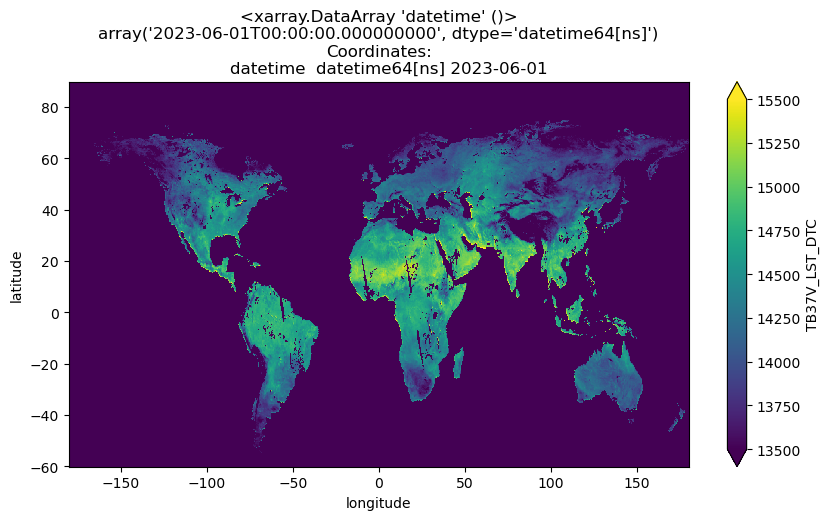

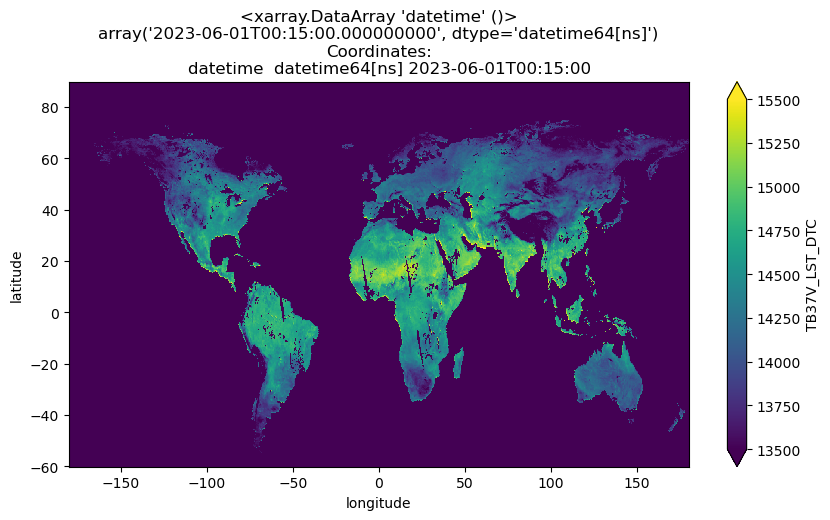

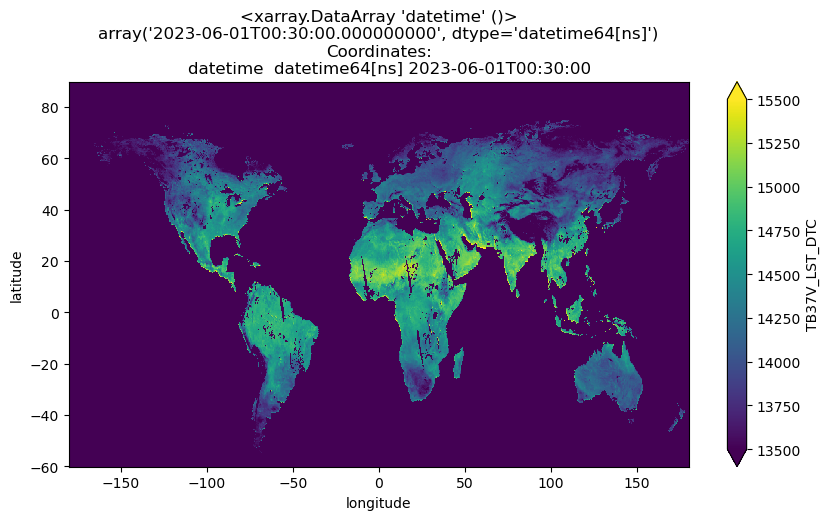

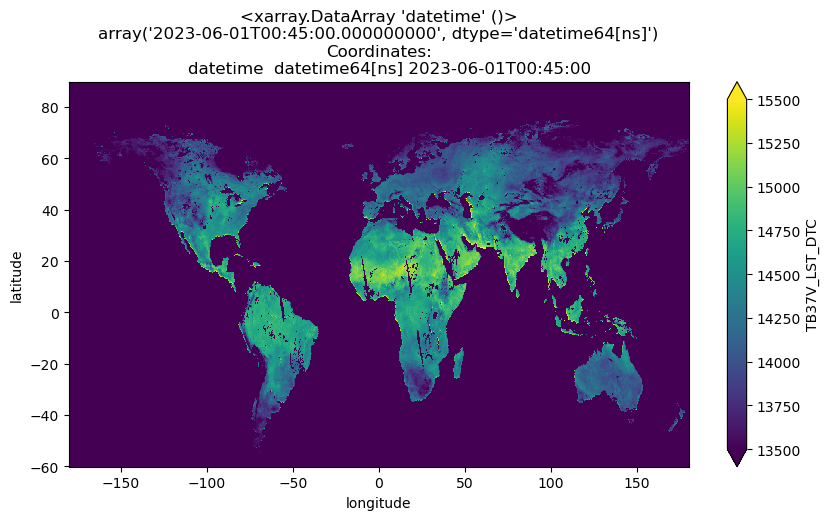

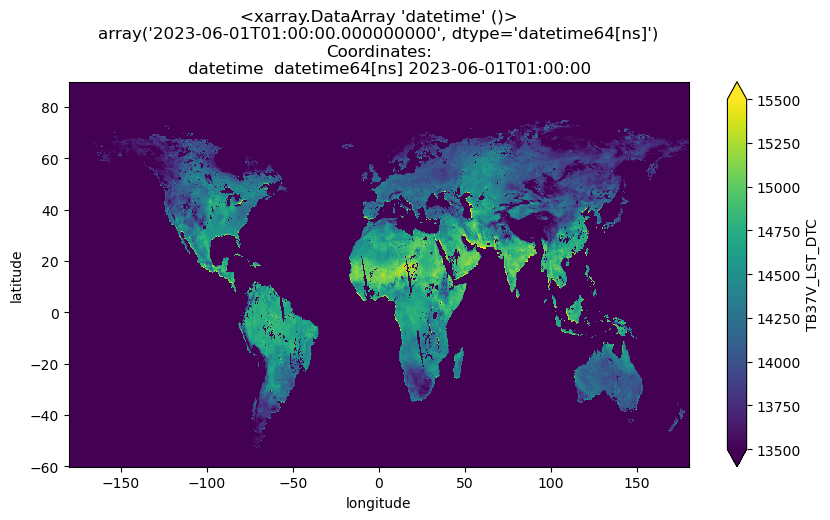

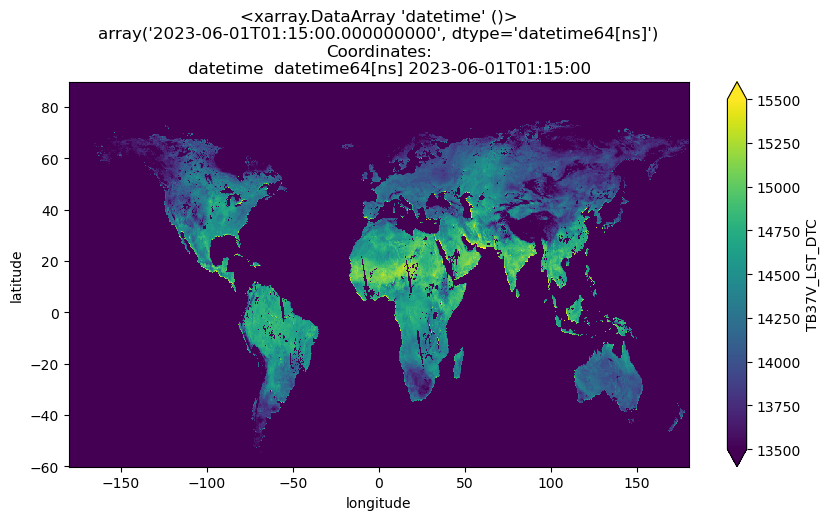

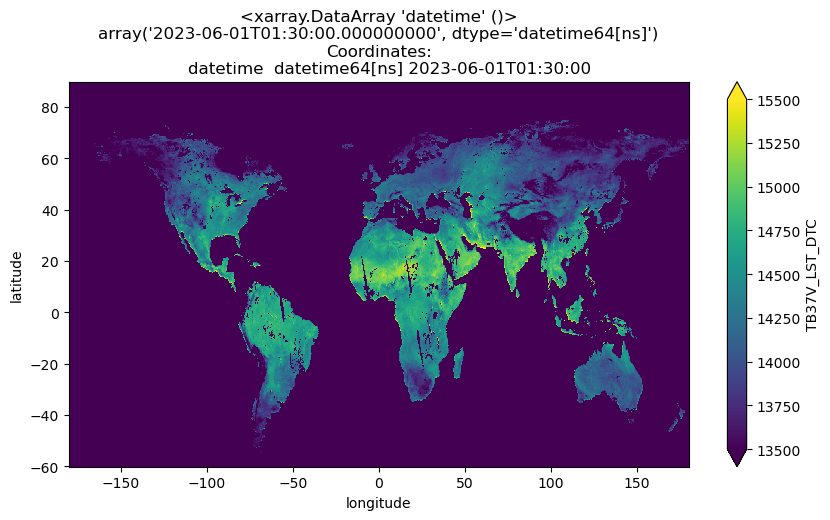

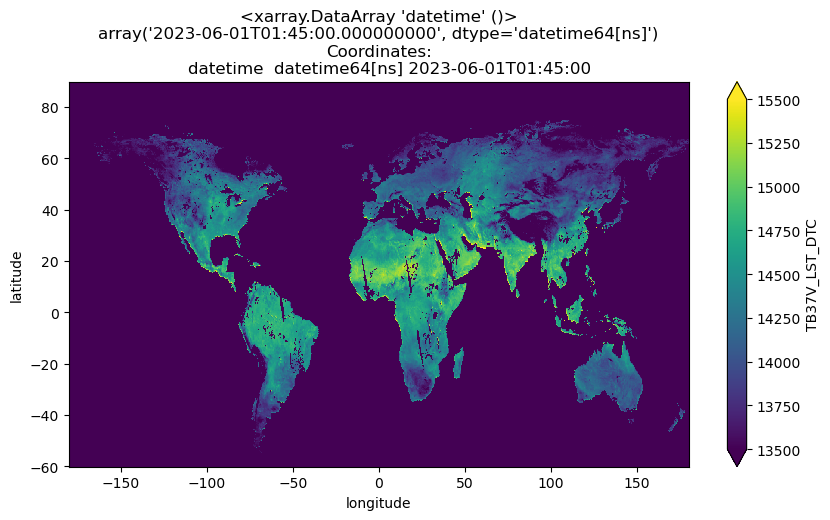

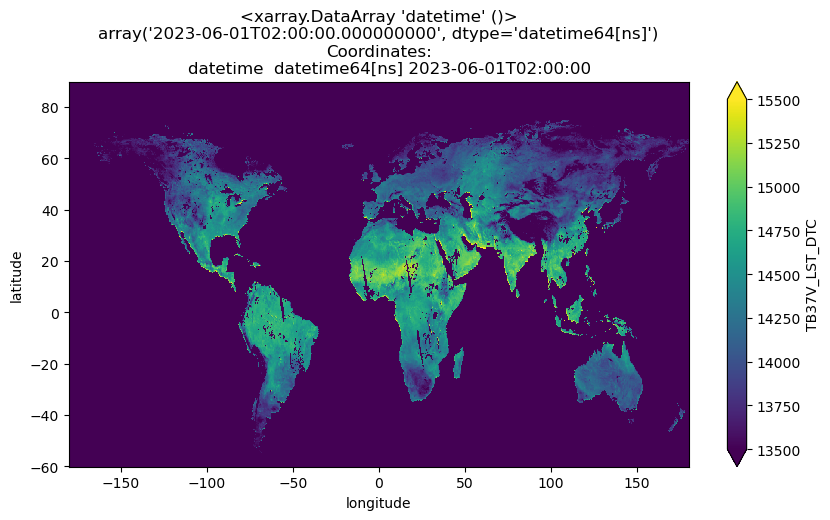

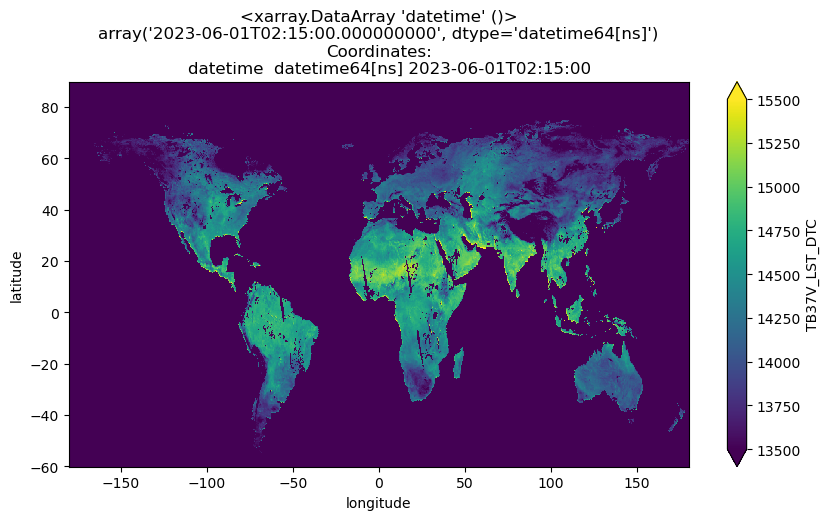

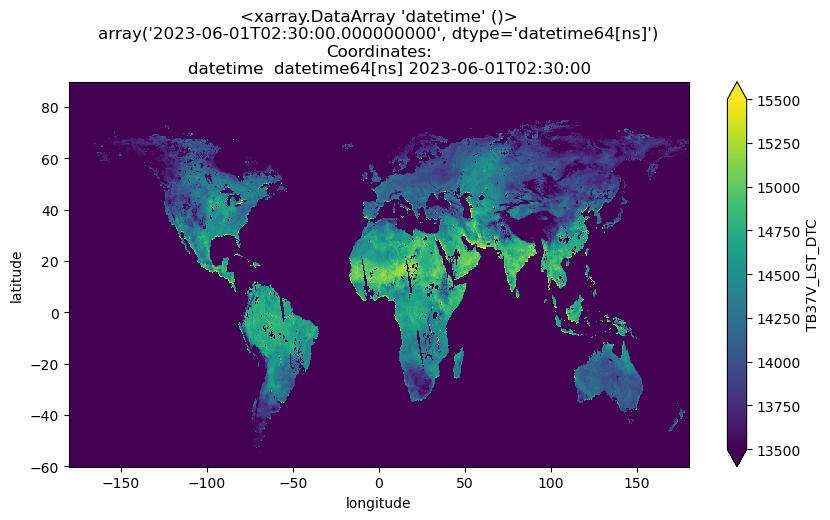

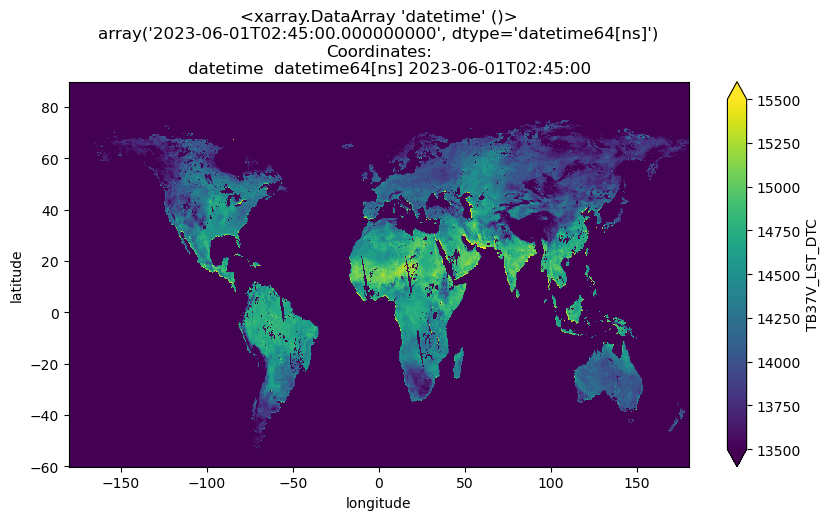

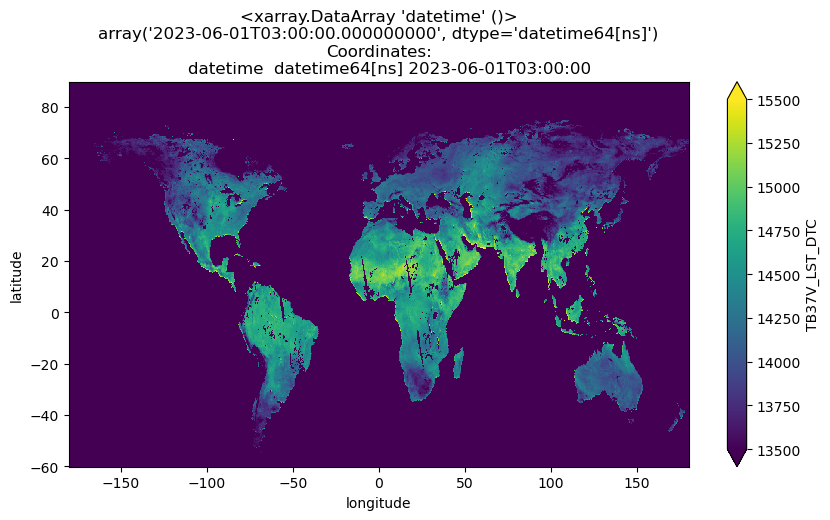

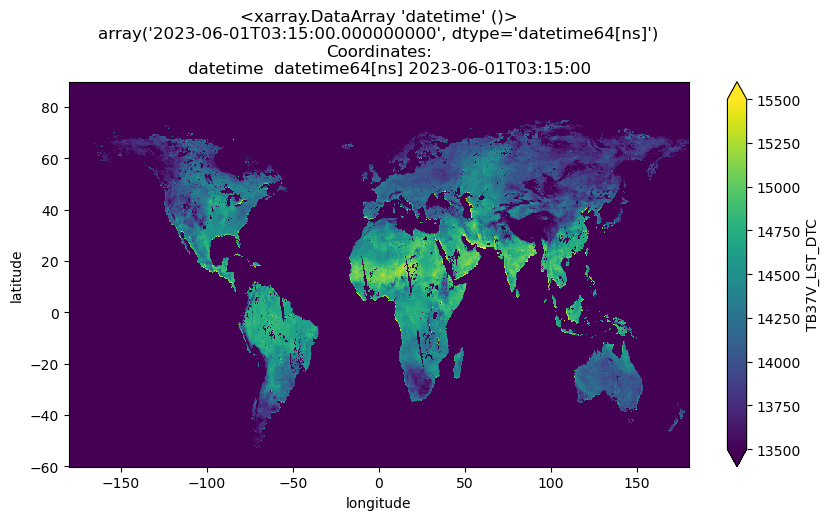

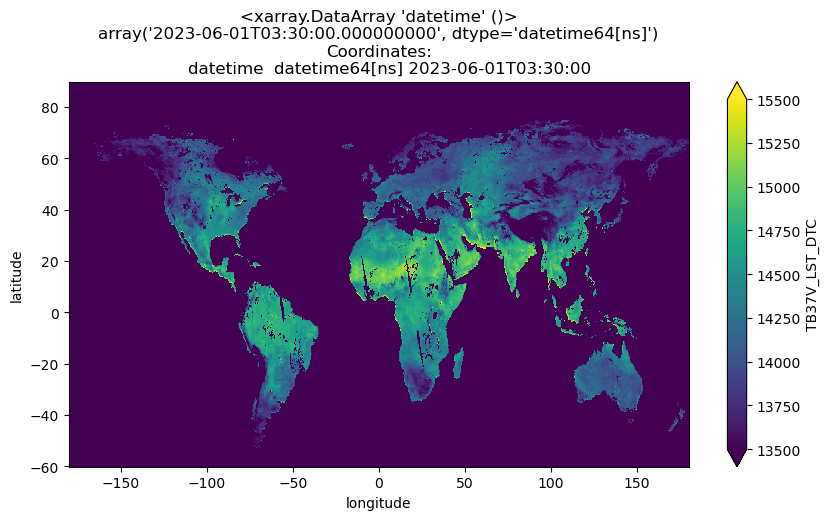

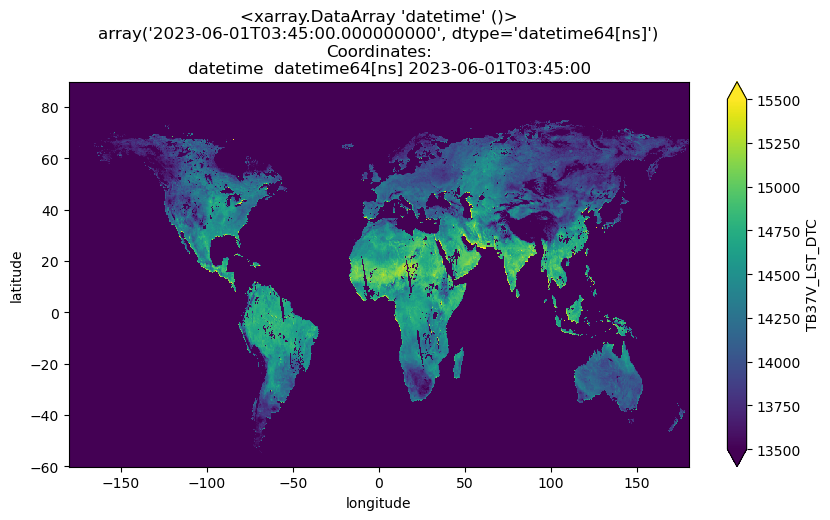

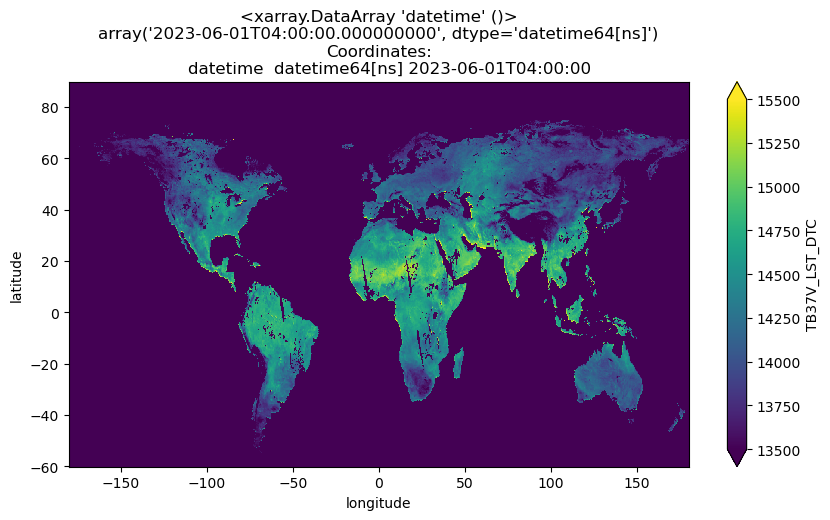

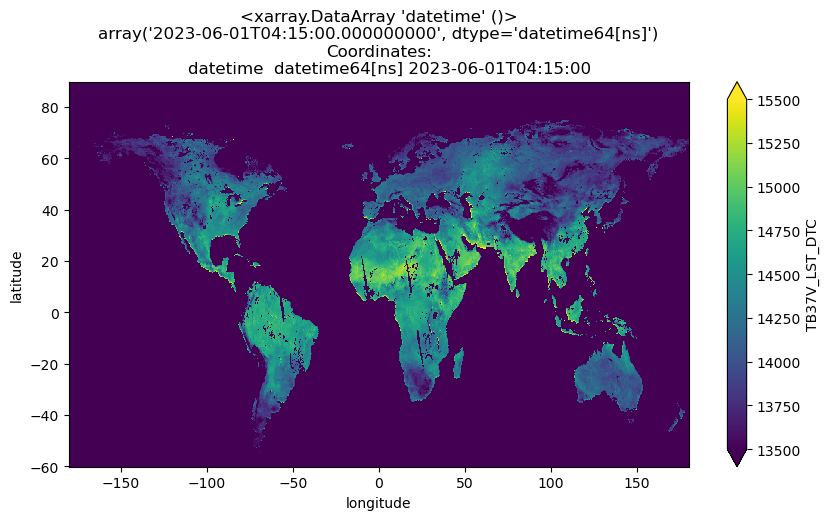

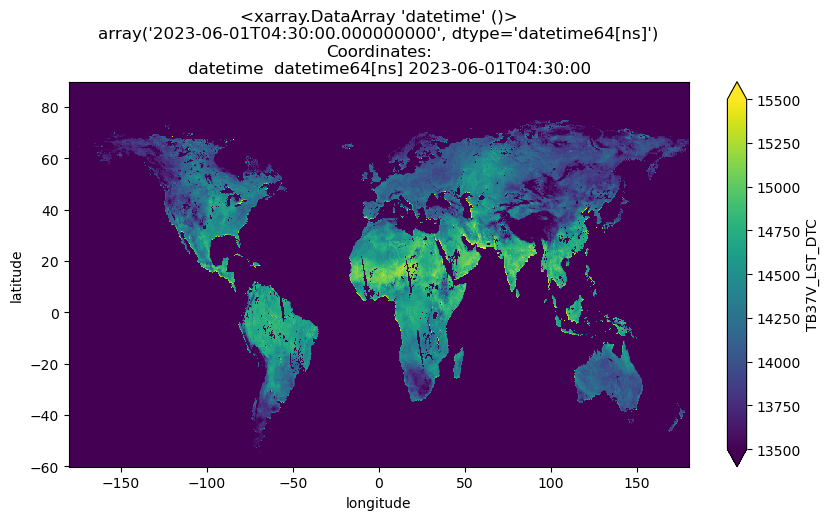

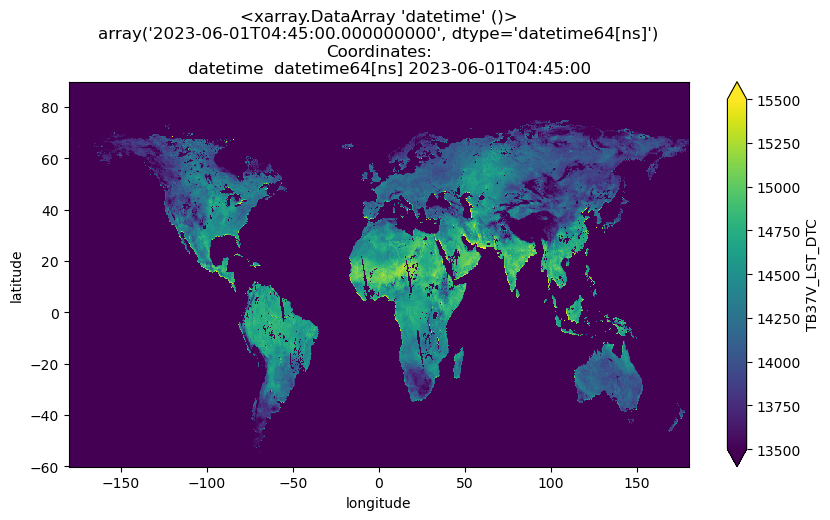

In [45]:
import matplotlib.pyplot as plt
for i in list(range(20)):
    #cb = plt.pcolormesh(dsMW['TB37V_LST_DTC'][i], vmin=13000, vmax=15000)
    dsMW['TB37V_LST_DTC'].isel(datetime=i).plot.pcolormesh("longitude", "latitude", vmin=13500, vmax=15500, figsize=(10,5))
    #plt.colorbar(cb)
    plt.title(dsMW['datetime'][i])
    #if i%24 == 0:
        #plt.savefig(f'../../photos/mw_{i}.jpg')
    plt.show()

In [64]:
np.max(latlon_pts[:,:,0]), np.min(latlon_pts[:,:,0]), np.max(latlon_pts[:,:,1]), np.min(latlon_pts[:,:,1])

(-76.35678404302193, -77.41798540201779, 39.49118340285552, 38.66410890419917)

In [65]:
def get_next_latlon_coord(n, above=True):
    if above:
        return np.ceil(n*4)/4
    else:
        return np.floor(n*4)/4

In [66]:
np.where(dsMW['latitude'] == 38.75)[0][0]

204

In [67]:
dsMW['TB37V_LST_DTC']

<xarray.DataArray 'TB37V_LST_DTC' (datetime: 96, longitude: 1440, latitude: 600)>
[82944000 values with dtype=uint16]
Coordinates:
    datetime   (datetime) datetime64[ns] 2023-05-31 ... 2023-05-31T23:45:00
    longitude  (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    latitude   (latitude) float64 89.75 89.5 89.25 89.0 ... -59.5 -59.75 -60.0
Attributes:
    Offset:   0.0
    Gain:     50.0
    NoData:   0.0

In [68]:
dsMW['TB37V_LST_DTC'][75,410:416,201:206] # DMV

<xarray.DataArray 'TB37V_LST_DTC' (longitude: 6, latitude: 5)>
[30 values with dtype=uint16]
Coordinates:
    datetime   datetime64[ns] 2023-05-31T18:45:00
    longitude  (longitude) float64 -77.5 -77.25 -77.0 -76.75 -76.5 -76.25
    latitude   (latitude) float64 39.5 39.25 39.0 38.75 38.5
Attributes:
    Offset:   0.0
    Gain:     50.0
    NoData:   0.0

In [69]:
dsMW['TB37V_LST_DTC'][75,410:416,201:206].values

array([[14636, 14701, 14595, 14606, 14590],
       [14570, 14525, 14453, 14481, 14406],
       [14495, 14343, 14068, 13985,     0],
       [14460, 14313, 14062,     0,     0],
       [14476, 14461, 14456, 14507,     0],
       [14615, 15071, 14739, 14647, 14875]], dtype=uint16)

In [70]:
def interpolate_mw(mw_DataArray, latlon_pts):
    # Initialize array of zeros with shape of desired array
    mw_values = np.zeros((3000,3000)).astype('uint16')

    # Loop through points in microwave array and add values
    # based on their closeset lat/lon points in the utm array
    for x in list(range(len(mw_DataArray['longitude']))):
        for y in list(range(len(mw_DataArray['latitude']))):
            mw_values += np.logical_and(np.abs(latlon_pts[:,:,0] - mw_DataArray['longitude'][x].values) < 0.125,
                                        np.abs(latlon_pts[:,:,1] - mw_DataArray['latitude'][y].values) < 0.125)\
                                        *mw_DataArray[x,y].values
    return mw_values

In [71]:
mwv = interpolate_mw(dsMW['TB37V_LST_DTC'][75,410:416,201:206], latlon_pts)

In [72]:
dsMW['TB37V_LST_DTC'][75,410,201:206].values

array([14636, 14701, 14595, 14606, 14590], dtype=uint16)

In [73]:
mwv.T[:,0]

array([14636, 14636, 14636, ..., 14606, 14606, 14606], dtype=uint16)

In [74]:
np.sum(mwv < 1)

535029

In [75]:
geotiff_dsG['microwave_LST'] = (('y','x'), mwv.T)

In [78]:
geotiff_dsG = geotiff_dsG.assign_attrs(long_name='(\'CMI_C13\', \'CMI_C14\', \'CMI_C15\', \'CMI_C16\', \'mw_LST\')')

In [79]:
geotiff_dsG

<xarray.Dataset>
Dimensions:        (y: 3000, x: 3000, pts: 2)
Coordinates:
  * x              (x) float64 2.92e+05 2.92e+05 2.921e+05 ... 3.82e+05 3.82e+05
  * y              (y) float64 4.372e+06 4.372e+06 ... 4.282e+06 4.282e+06
    spatial_ref    int64 0
    latlons        (y, x, pts) float64 -77.42 39.47 -77.42 ... -76.36 38.68
Dimensions without coordinates: pts
Data variables:
    GOES_C13_LWIR  (y, x) float64 ...
    GOES_C14_LWIR  (y, x) float64 298.9 298.9 298.9 298.9 ... 300.0 300.0 300.0
    GOES_C15_LWIR  (y, x) float64 ...
    GOES_C16_LWIR  (y, x) float64 ...
    microwave_LST  (y, x) uint16 14636 14636 14636 14636 ... 14647 14647 14647
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('CMI_C13', 'CMI_C14', 'CMI_C15', 'CMI_C16', 'mw_LST')
    Datetime:       2023-06-01 00:46:17.400000+00:00

## Export and re-open

In [226]:
# Export the data
#geotiff_dsLS.rio.to_raster("../../Landsat_Sentinel_DMV_processed/Landsat_sample.tif")
#geotiff_dsG.rio.to_raster("../../Landsat_Sentinel_DMV_processed/GOES_sample.tif")
geotiff_dsG.to_netcdf("../../Landsat_Sentinel_DMV_processed/GOES_sample.nc")

In [1]:
ds = rioxarray.open_rasterio("../../Landsat_Sentinel_DMV_processed/processed_Landsat_tif_8.tif")

NameError: name 'rioxarray' is not defined

In [63]:
rioxarray.open_rasterio("../../GOES_DMV_processed/processed_GOES_tif_0.tif")

<xarray.DataArray (band: 4, y: 3000, x: 3000)>
[36000000 values with dtype=float64]
Coordinates:
  * band         (band) int64 1 2 3 4
  * x            (x) float64 2.92e+05 2.92e+05 2.921e+05 ... 3.82e+05 3.82e+05
  * y            (y) float64 4.372e+06 4.372e+06 ... 4.282e+06 4.282e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    Datetime:       2023-05-31 23:46:17.400000
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('GOES_C13_LWIR', 'GOES_C14_LWIR', 'GOES_C15_LWIR', 'GOES...

In [ ]:
######################################################
# End of tif processing part
# Below is gridding of Baltimore

In [31]:
grid_lats = [39.2576, 39.3147, 39.3718]
grid_lons = [-76.5299, -76.6204, -76.7108]

In [37]:
grid1 = geotiff_ds.sel(longitude=slice(grid_lons[2], grid_lons[1])).sel(latitude=slice(grid_lats[2], grid_lats[1]))
grid2 = geotiff_ds.sel(longitude=slice(grid_lons[1], grid_lons[0])).sel(latitude=slice(grid_lats[2], grid_lats[1]))
grid3 = geotiff_ds.sel(longitude=slice(grid_lons[2], grid_lons[1])).sel(latitude=slice(grid_lats[1], grid_lats[0]))
grid4 = geotiff_ds.sel(longitude=slice(grid_lons[1], grid_lons[0])).sel(latitude=slice(grid_lats[1], grid_lats[0]))

In [38]:
grid4

<xarray.Dataset>
Dimensions:                             (latitude: 212, longitude: 336)
Coordinates:
  * longitude                           (longitude) float64 -76.62 ... -76.53
  * latitude                            (latitude) float64 39.31 39.31 ... 39.26
    spatial_ref                         int64 0
Data variables: (12/14)
    Landsat_Blue_Vis_Sfc_Reflectance    (latitude, longitude) float64 ...
    Landsat_Red_Vis_Sfc_Reflectance     (latitude, longitude) float64 ...
    Landsat_NIR_Sfc_Reflectance         (latitude, longitude) float64 ...
    Landsat_SWIR1_Sfc_Reflectance       (latitude, longitude) float64 ...
    Landsat_SWIR2_Sfc_Reflectance       (latitude, longitude) float64 ...
    Landsat_LST                         (latitude, longitude) float64 ...
    ...                                  ...
    GOES_Red_Vis_Reflectance            (latitude, longitude) float64 ...
    GOES_NIR_Veggie_Reflectance         (latitude, longitude) float64 ...
    GOES_NIR_SnowIce_Reflectance        (latitude, longitude) float64 ...
    GOES_NIR_CloudParticle_Reflectance  (latitude, longitude) float64 ...
    GOES_LWIR_Brightness_Temp           (latitude, longitude) float64 ...
    GOES_Dirty_LWIR_Brightness_temp     (latitude, longitude) float64 ...
Attributes:
    AREA_OR_POINT:    Area
    scale_factor:     1.0
    add_offset:       0.0
    long_name:        ('SR_B2', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'ST_B10',...
    Cloud_Mask_Bits:  Bit 0: Fill\nBit 1: Dilated Cloud\nBit 2: Cirrus (high ...
    Datetime:         2023-01-11 10:46:33.089500